In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

save_path = r'/home/luan/Documentos/figuras_pesquisa/IC_Chemical_Potential/'

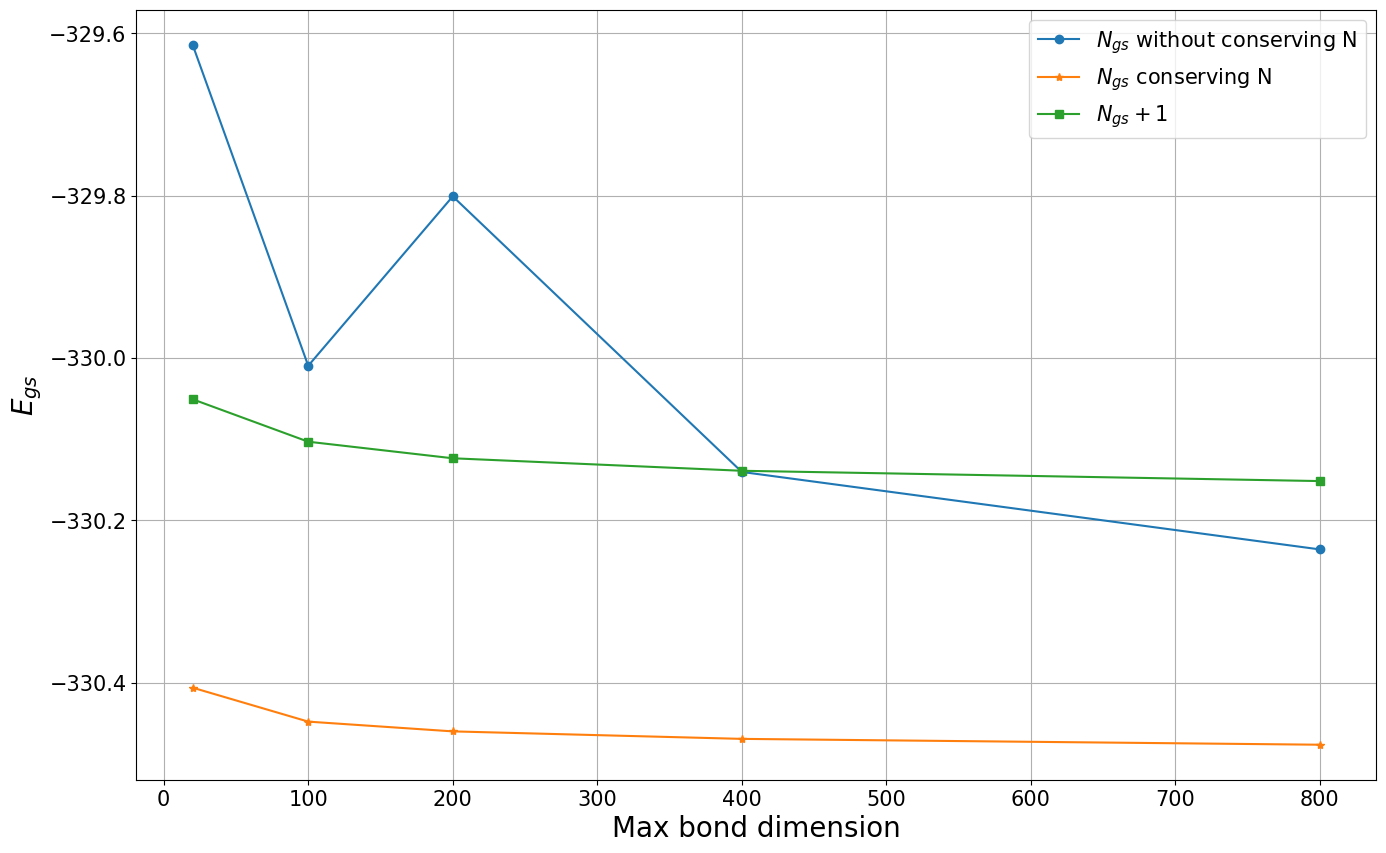

In [3]:
df = pd.read_csv(r'DMRG/ConvergenceU10N40.csv')

EGS_apr = np.array(df['EGS_without_QN'])
EGS = np.array(df['EGS_with_QN'])
EGS_m1 = np.array(df['EGS_minus_1'])
EGS_p1 = np.array(df['EGS_plus_1'])

x = np.array([20, 100, 200, 400, 800])

fig = plt.figure(figsize = (16, 10))

plt.plot(x, EGS_apr, marker = 'o', label = r'$N_{gs}$ without conserving N')
plt.plot(x, EGS, marker = '*',label = r'$N_{gs}$ conserving N')
#plt.plot(x, EGS_m1, label = r'$N_{gs} - 1$')
plt.plot(x, EGS_p1, marker = 's', label = r'$N_{gs} + 1$')

plt.xlabel(r'Max bond dimension', fontsize = 20)
plt.ylabel(r'$E_{gs}$', fontsize = 20)

plt.tick_params(labelsize = 15)

plt.legend(fontsize = 15)

plt.grid(visible = True)

plt.savefig(save_path + 'Conv_U10N40.png', format = 'png')

plt.show()

0.8212850627212518


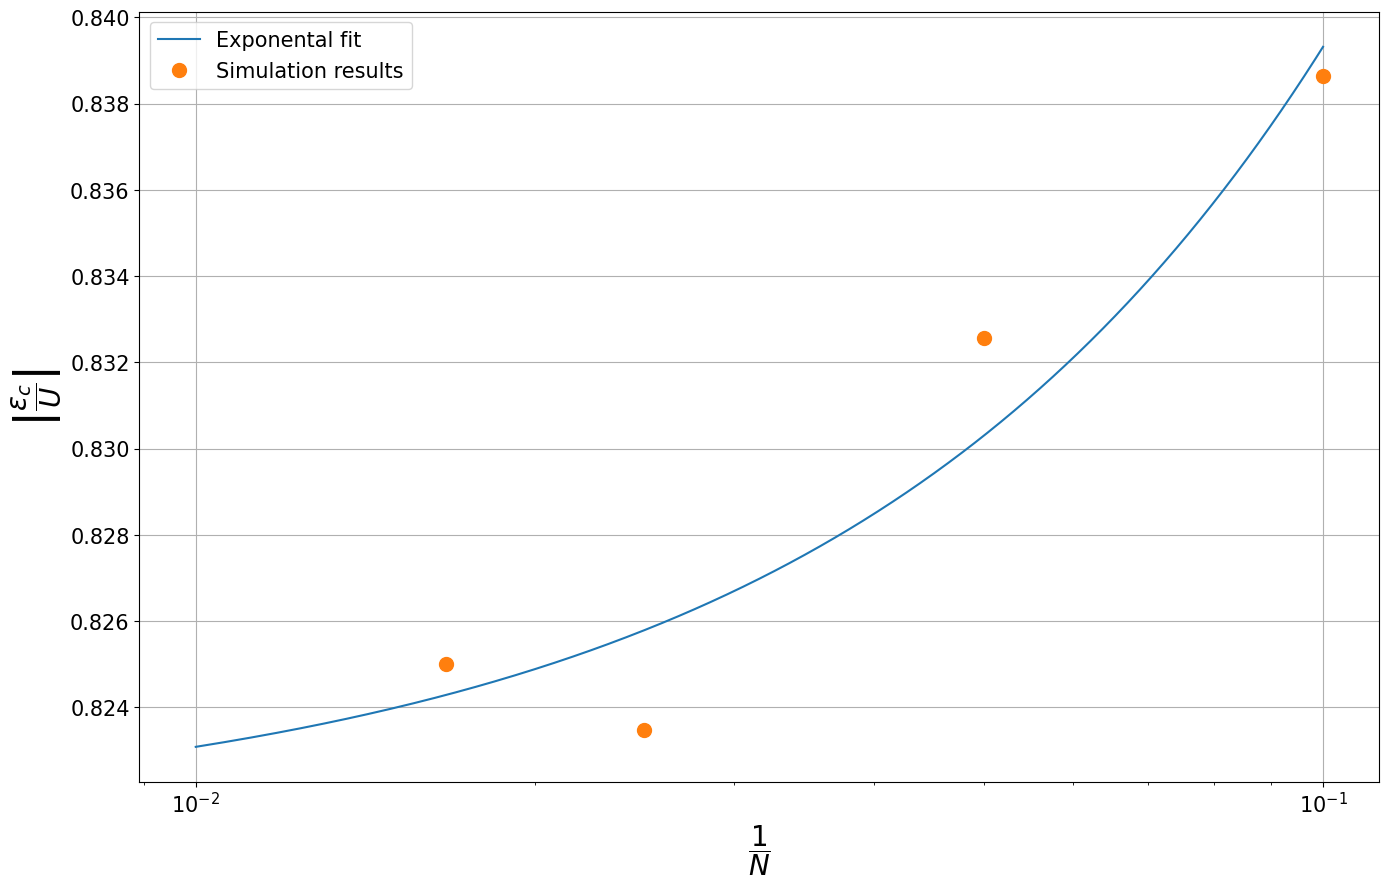

In [35]:
Ns = [10, 20, 40, 60]
u = 10


mu = []
for i in range(len(Ns)):
    df = pd.read_csv(f'DMRG/DMRG_CSVs/U10N{Ns[i]}.csv')

    onsite = np.array(df['Onsite_Energy'])
    mu_ = np.array(df['Chemical_Potential'])
    mu.append(mu_)
    
mu = np.array(mu)

aux2 = []
for j in range(len(Ns)):
    y = mu[j]
    
    aux1 = []
    for i in range(len(onsite)-1):
        aux = []

        aux.append(y[i])
        aux.append(y[i+1])
        if np.abs(aux[1]-aux[0])/u > 0.2:
            #print(y[i], '   ', y[i+1])
            #print((onsite[i+1]+onsite[i])/2)
            #print(Ns[j])
            aux1.append((onsite[i+1]+onsite[i])/2)
    aux2.append(max(aux1))

def Ajuste(x, a, b, c):
    return a + b*np.exp(c*x)

edc = np.array(aux2)
N_ = np.array(Ns)

params, cov = curve_fit(Ajuste, 1/N_, np.abs(edc)/u, p0 = [0.8, 1, 1])

print(params[0]+params[1])

x_ = np.arange(0.01, 0.1, 0.0001)

fig = plt.figure(figsize = (16, 10))

plt.plot(x_, params[0] + params[1]*np.exp(params[2]*x_), label = r'Exponental fit')
plt.semilogx(1/N_, np.abs(edc)/u, 'o', markersize = 10, label = r'Simulation results')
plt.xlabel(r'$\dfrac{1}{N}$', fontsize = 20)
plt.ylabel(r'$\left|\dfrac{\epsilon_c}{U}\right|$', fontsize = 20)
plt.tick_params(labelsize = 15)

plt.grid(visible = True)

plt.legend(fontsize = 15)

#plt.tight_layout

plt.savefig(save_path + r'exp_fit.png', format = 'png')

plt.show()

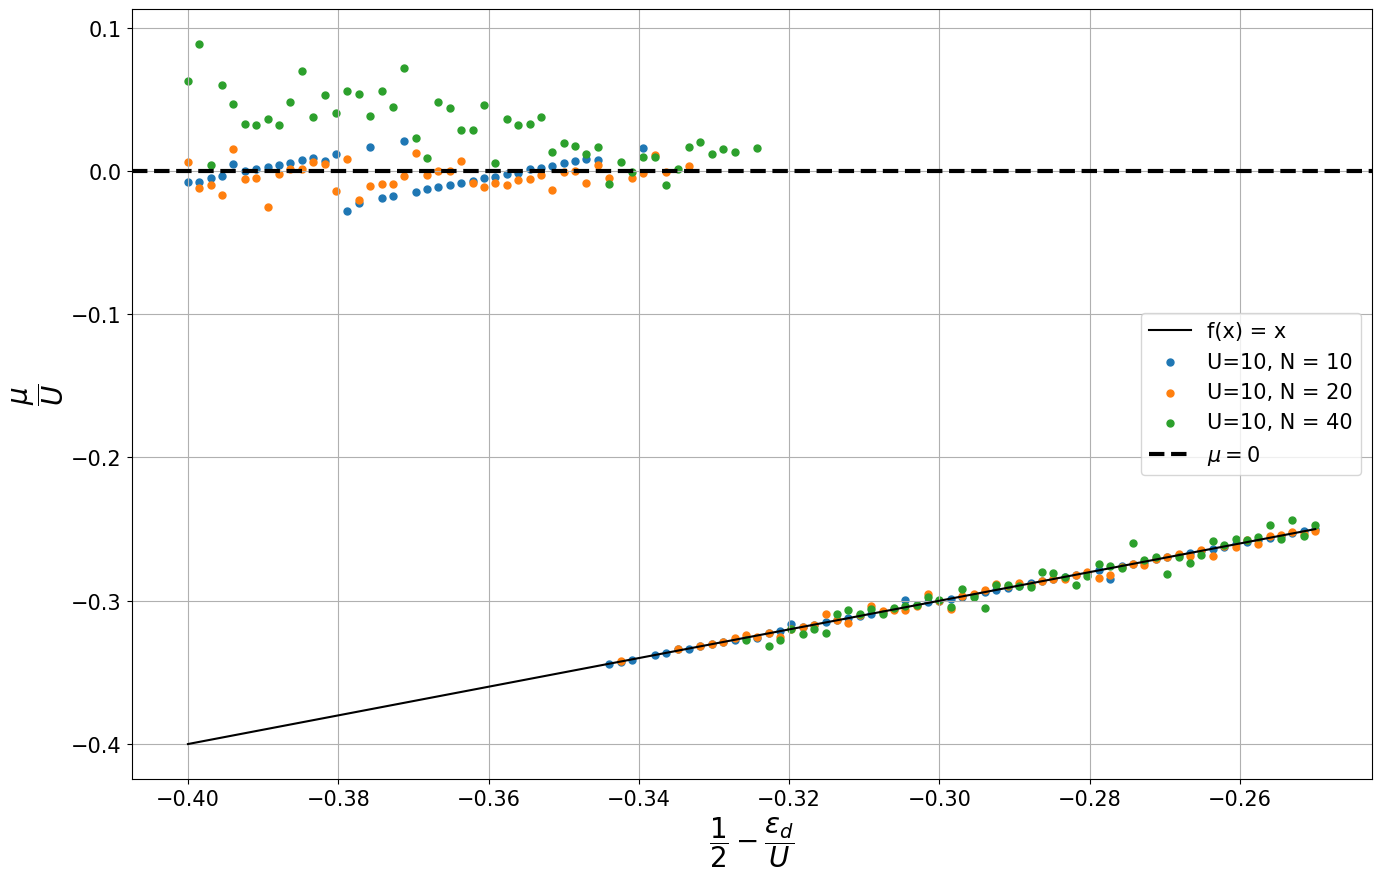

In [26]:
onsite_ren = 1/2 + onsite/10


x = np.copy(onsite_ren)

y = x

fig = plt.figure(figsize = (16, 10))

plt.plot(x, y, color = 'black', label = r'f(x) = x')
for i in range(len(Ns)):
    plt.scatter(onsite_ren, mu[i]/10, label = f'U=10, N = {Ns[i]}', s = 25)

plt.xlabel(r'$\dfrac{1}{2}-\dfrac{\epsilon_d}{U}$', fontsize = 20)
plt.ylabel(r'$\dfrac{\mu}{U}$', fontsize = 20)

plt.axhline(0, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$\mu = 0$')

plt.tick_params(labelsize = 15)

plt.legend(loc = 'center right', fontsize = 15)

plt.tight_layout

plt.grid(visible = True)

plt.savefig(save_path + r'Chem_Pot_U10.png', format = 'png')

plt.show()

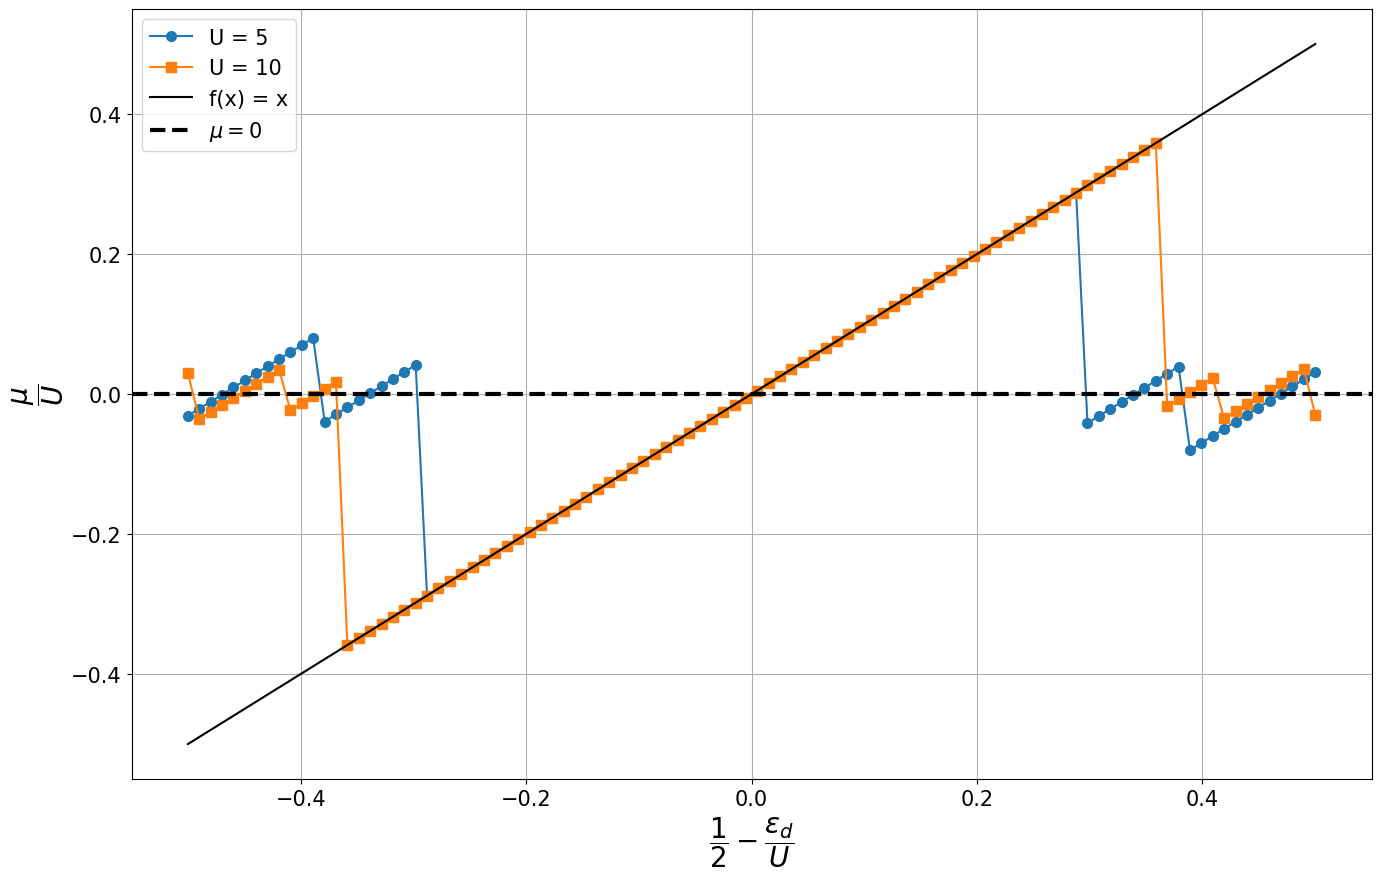

In [25]:
df1 = pd.read_csv(r'ED_N6U10.csv')
df2 = pd.read_csv(r'ED_N6U5.csv')

x = np.array(df1['x'])

mu1 = np.array(df1['mu'])
mu2 = np.array(df2['mu'])

fig = plt.figure(figsize = (16, 10))

plt.plot(x, mu2, marker = 'o', label = 'U = 5', markersize = 7)
plt.plot(x, mu1, marker = 's', label = 'U = 10', markersize = 7)
plt.plot(x, x, color = 'black', label = 'f(x) = x')

plt.axhline(0, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$\mu = 0$')

plt.xlabel(r'$\dfrac{1}{2} - \dfrac{\epsilon_d}{U}$', fontsize = 20)
plt.ylabel(r'$\dfrac{\mu}{U}$', fontsize = 20)

plt.tick_params(labelsize = 15)

plt.legend(loc = 'upper left', fontsize = 15)

plt.grid(visible = True)

plt.savefig(save_path+'ED_results.png', format = 'png')

plt.show()